In [1]:
import sqlite3
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn import metrics

PROJ: proj_create_from_database: Cannot find proj.db


### Copy Figure 1


In [1]:
import datetime
import string

import pandas as pd
import sqlite3

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import geopandas as gpd
import fiona

PROJ: proj_create_from_database: Cannot find proj.db


In [2]:
urban_completeness = ("../data/global_urban_building_completeness.gpkg")
fiona.listlayers(urban_completeness)

['Europe & Central Asia_2022-01-01',
 'Sub-Saharan Africa_2022-01-01',
 'ne_10m_admin_0_countries',
 'graticule',
 'ne_50m_land',
 'all_parameters_urban_centers',
 'all_parameters_urban_centers_grid',
 'rf_adjusted_prediction_reference_and_osm',
 'rf_adjusted_prediction_reference_and_osm_urban_centers',
 'inequality_measures_urban_centers',
 'performance_20_clusters_reference_and_osm',
 'Europe & Central Asia_2010-01-01',
 'Europe & Central Asia_2014-01-01',
 'Europe & Central Asia_2023-01-01',
 'Sub-Saharan Africa_2010-01-01',
 'Sub-Saharan Africa_2014-01-01',
 'Sub-Saharan Africa_2023-01-01',
 'geowiki_grids_final',
 'performance_20_clusters_reference_and_osm_v2024',
 'rf_adjusted_prediction_reference_and_osm_urban_centers_v2024',
 'rf_adjusted_prediction_reference_and_osm_v2024',
 'model_performance_cluster_20_reference_and_osm',
 'osm_user_contributions_per_urban_center_with_data_teams_csv',
 'intra_urban_completeness_stats_clusters',
 'osm_user_contributions_per_urban_center_per_d

In [19]:
def load_dataframe(column):
    con = sqlite3.connect("../data/global_urban_building_completeness.gpkg")
    query = f"""
            select 
              {column} as group_name,
              urban_center_id,
              100*prediction_osm_completeness_2008_01 as "2008",
              100*prediction_osm_completeness_2009_01 as "2009",
              100*prediction_osm_completeness_2010_01 as "2010",
              100*prediction_osm_completeness_2011_01 as "2011",
              100*prediction_osm_completeness_2012_01 as "2012",
              100*prediction_osm_completeness_2013_01 as "2013",
              100*prediction_osm_completeness_2014_01 as "2014",
              100*prediction_osm_completeness_2015_01 as "2015",
              100*prediction_osm_completeness_2016_01 as "2016",
              100*prediction_osm_completeness_2017_01 as "2017",
              100*prediction_osm_completeness_2018_01 as "2018",
              100*prediction_osm_completeness_2019_01 as "2019",
              100*prediction_osm_completeness_2020_01 as "2020",
              100*prediction_osm_completeness_2021_01 as "2021",
              100*prediction_osm_completeness_2022_01 as "2022",
              100*prediction_osm_completeness_2023_01 as "2023",
              100*prediction_osm_completeness_2024_05 as "2024"
            


            from rf_adjusted_prediction_reference_and_osm_urban_centers_v2024 as a
            where {column} is not null
            order by group_name 
    """
    df = pd.read_sql_query(query, con=con)
    return df

,group_name,urban_center_id,year,prediction_osm_completeness
0,East Asia & Pacific,1,2008-01-01,0.000000
1,East Asia & Pacific,2,2008-01-01,0.000000
2,East Asia & Pacific,4,2008-01-01,0.000000
3,East Asia & Pacific,163,2008-01-01,0.000000
4,East Asia & Pacific,168,2008-01-01,0.000000
...,...,...,...,...
198657,Sub-Saharan Africa,8591,2024-01-01,84.972565
198658,Sub-Saharan Africa,8594,2024-01-01,1.290307
198659,Sub-Saharan Africa,8597,2024-01-01,42.341833
198660,Sub-Saharan Africa,8600,2024-01-01,90.320593


['Europe & Central Asia']
['North America']
['Sub-Saharan Africa']
['Latin America & Caribbean']
['East Asia & Pacific']
['Middle East & North Africa']
['South Asia']


,group_name,urban_center_id,year,prediction_osm_completeness
0,high,1,2008-01-01,0.000000
1,high,2,2008-01-01,0.000000
2,high,5,2008-01-01,0.000000
3,high,10,2008-01-01,0.000000
4,high,11,2008-01-01,0.000000
...,...,...,...,...
198657,very high,11681,2024-01-01,0.000000
198658,very high,11682,2024-01-01,4.177976
198659,very high,11683,2024-01-01,1.255929
198660,very high,11684,2024-01-01,0.204402


['low']
['medium']
['high']
['very high']


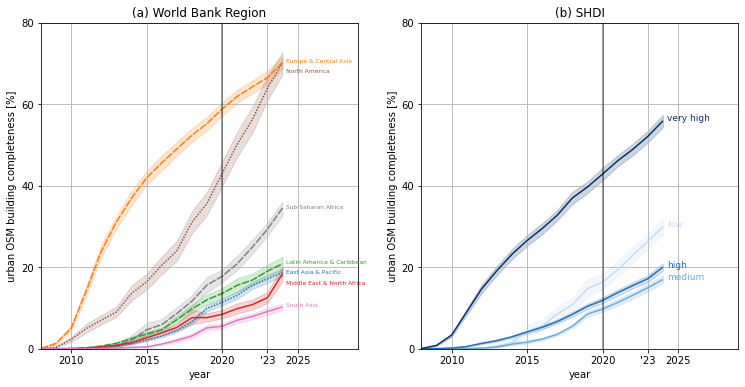

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12.5, 6))
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.2, hspace=0.3) # set the spacing between axes.


all_months = [
    datetime.date(2008, 1, 1),
    datetime.date(2009, 1, 1),
    datetime.date(2010, 1, 1),
    datetime.date(2011, 1, 1),
    datetime.date(2012, 1, 1),
    datetime.date(2013, 1, 1),
    datetime.date(2014, 1, 1),
    datetime.date(2015, 1, 1),
    datetime.date(2016, 1, 1),
    datetime.date(2017, 1, 1),
    datetime.date(2018, 1, 1),
    datetime.date(2019, 1, 1),
    datetime.date(2020, 1, 1),
    datetime.date(2021, 1, 1),
    datetime.date(2022, 1, 1),
    datetime.date(2023, 1, 1),
    datetime.date(2024, 1, 1)
    
]
 
for k, column in enumerate([
    "region_wb",
    "shdi_2021_class", 
]):
    df = load_dataframe(column)
    
    if column == "region_wb":
        title = "World Bank Region"
        groups = wb_regions_groups = [
            ["Europe & Central Asia"],
            ["North America"],
            ["Sub-Saharan Africa"],
            ["Latin America & Caribbean"],
            ["East Asia & Pacific"],
            ["Middle East & North Africa"],
            ["South Asia"],

        ]

        labels = [
            "Europe & Central Asia",
            "North America",
            "Sub-Saharan Africa",
            "Latin America & Caribbean",
            "East Asia & Pacific",
            "Middle East & North Africa",
            "South Asia",
        ]
        
        cmap = matplotlib.cm.get_cmap('tab10')
        colors_dict = {
            "East Asia & Pacific": cmap(0),
            "Europe & Central Asia": cmap(0.125),
            "Latin America & Caribbean": cmap(0.25),
            "Middle East & North Africa": cmap(0.375),
            "North America": cmap(0.5),
            "South Asia": cmap(0.625),
            "Sub-Saharan Africa": cmap(0.75),
            "all": "black",
        }

        linestyles_dict = {
            "East Asia & Pacific": ('dotted', (0, (1, 1))),
            "Europe & Central Asia": ('densely dashed', (0, (5, 1))),
            "Latin America & Caribbean": ('densely dashed', (0, (5, 1))),
            "Middle East & North Africa": ('solid', (0, ())),
            "North America": ('dotted', (0, (1, 1))),
            "South Asia": ('solid',(0, ())),
            "Sub-Saharan Africa": ('densely dashed', (0, (5, 1))),
            "all":  ('solid', (0, ())),
        }
        
        fontsize = 6
        
    elif column == "shdi_2021_class":
        
    
        title = "SHDI"
        groups = [
            ["low"], ["medium"], ["high"], ["very high"]
        ]

        labels = [
            "low",
            "medium",
            "high",
            "very high",
        ]
             
        cmap = matplotlib.cm.get_cmap('Blues')
        colors_dict = {
            "low": cmap(0.25), # low
            "medium": cmap(0.5),  # medium
            "high": cmap(0.75),  # high
            "very high": cmap(1.0),  # very high
        }
        
        linestyles_dict = {
            "low": ('solid',                 (0, ())),
            "medium": ('solid',                 (0, ())),
            "high": ('solid',                 (0, ())),
            "very high": ('solid',                 (0, ())),
        }
        
        fontsize = 9
        
    
    df = df.melt(
        id_vars=["group_name", "urban_center_id"], 
        var_name="year", 
        value_name="prediction_osm_completeness"
    )
    df["year"] = df["year"].apply(pd.to_datetime)
    display(df)
    
    ax = plt.subplot(gs1[k])
    max_y_values = []
    
    for i, group in enumerate(groups):
        print(group)
        
        region_df = df.loc[df["group_name"].isin(group)]
        region_df.reset_index(inplace=True)
        
        sns.lineplot(
            data=region_df,
            x="year",
            y="prediction_osm_completeness",
            color=colors_dict[group[0]],
            linestyle=linestyles_dict[group[0]][1],
            errorbar=('ci', 95)
        )

        max_y_value = region_df.loc[region_df["year"] == '2024']["prediction_osm_completeness"].mean()
        max_y_values.append(max_y_value)
        
        '''if i == 0:
            label_position = max_y_values[i]
        elif (abs(max_y_values[i-1] - max_y_values[i]) < 2.5) and column == "region_wb":
            print(max_y_values[i], max_y_values[i-1], label_position)
            label_position = float(max_y_values[i]) - 2.5
        elif (abs(max_y_values[i-1] - max_y_values[i]) < 2.5) and column == "shdi_class":
            print(max_y_values[i], max_y_values[i-1], label_position)
            label_position = float(max_y_values[i]) + 0.5
        else:
            label_position = max_y_values[i]'''
        
        def adjust_label_positions(max_y_values, min_distance=2.5):
            adjusted_positions = []
            
            for i in range(len(max_y_values)):
                # Start with the original position
                label_position = max_y_values[i]
                
                # Compare with all previous labels
                for prev_position in adjusted_positions:
                    if abs(label_position - prev_position) < min_distance:
                        # Adjust position by moving it further away (downward in this case)
                        label_position = prev_position - min_distance
                
                # Save the adjusted position
                adjusted_positions.append(label_position)
            
            return adjusted_positions
        
        # Adjust the label positions based on overlap detection
        adjusted_positions = adjust_label_positions(max_y_values)
        
        ax.annotate(
            labels[i],
            (datetime.date(2024, 4, 1), adjusted_positions[i]),
            fontsize=fontsize,
            color=colors_dict[group[0]]
        )
       

    ax.set_ylim([0, 70])
    ax.set_xlim([datetime.date(2008, 1, 1), datetime.date(2029, 1, 1)])
    ax.set_xticks([
        datetime.date(2010, 1, 1),
        datetime.date(2015, 1, 1),
        datetime.date(2020, 1, 1),
        datetime.date(2023, 1, 1),
        datetime.date(2025, 1, 1),
    ])
    ax.set_xticklabels(["2010", "2015", "2020", "'23", "2025"])
    ax.set_yticks([
        0, 20, 40, 60, 80
    ])
    ax.plot(
        [datetime.date(2020, 1, 1), datetime.date(2020, 1, 1)],
        [0, 100],
        color="black",
        alpha=0.5
    )
    ax.set_ylabel("urban OSM building completeness [%]")
    ax.grid()
    ax.set_title(f"({string.ascii_lowercase[k]}) {title}")
        
fig.patch.set_facecolor('xkcd:white')
plt.savefig(
    f"../figures/completeness_per_month_by_region_2024.png",
    dpi=300,
    bbox_inches = 'tight',
    pad_inches = 0.25
)
plt.show()

### calculate difference between Jan 2023 and May 2024

In [28]:
#grouped by region
import geopandas as gpd
gdf = gpd.read_file("../data/global_urban_building_completeness.gpkg", layer="rf_adjusted_prediction_reference_and_osm_urban_centers_v2024")
gdf["prediction_osm_completeness_2024_05"] = gdf["prediction_osm_completeness_2024_05"].apply(lambda x: 1 if x > 1 else x)
gdf["prediction_osm_completeness_2023_01"] = gdf["prediction_osm_completeness_2023_01"].apply(lambda x: 1 if x > 1 else x)
gdf["difference"] = gdf["prediction_osm_completeness_2024_05"] - gdf["prediction_osm_completeness_2023_01"]
grouped = gdf.groupby('region_wb')['difference'].mean().reset_index()
grouped

,region_wb,difference
0,East Asia & Pacific,0.015981
1,Europe & Central Asia,0.036755
2,Latin America & Caribbean,0.017562
3,Middle East & North Africa,0.060674
4,North America,0.061085
5,South Asia,0.011416
6,Sub-Saharan Africa,0.050764


In [31]:
#grouped by shdi class
gdf = gpd.read_file("../data/global_urban_building_completeness.gpkg", layer="rf_adjusted_prediction_reference_and_osm_urban_centers_v2024", where="total_area_sqkm>150")
print(len(gdf))
gdf["prediction_osm_completeness_2024_05"] = gdf["prediction_osm_completeness_2024_05"].apply(lambda x: 1 if x > 1 else x)
gdf["prediction_osm_completeness_2023_01"] = gdf["prediction_osm_completeness_2023_01"].apply(lambda x: 1 if x > 1 else x)
gdf["difference"] = gdf["prediction_osm_completeness_2024_05"] - gdf["prediction_osm_completeness_2023_01"]
grouped = gdf.groupby('shdi_2021_class')['difference'].mean().reset_index()
grouped

11686


,shdi_2021_class,difference
0,high,0.028980
1,low,0.034935
2,medium,0.019966
3,very high,0.037329
